## Install required libraries

In [1]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import libraries

In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import os

c:\Users\rehma\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load dataset

In [3]:
dataset = load_dataset("shishir-dwi/News-Article-Categorization_IAB")
df = dataset['train'].to_pandas()

### Filter Dataset

In [4]:
from langdetect import detect

# Function to detect language
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False  # Handle errors gracefully

In [5]:
chunk_size = 900
num_chunks = (len(df) // chunk_size) + (1 if len(df) % chunk_size != 0 else 0)  # Total chunks
filtered_chunks = []

print(f"Total chunks to process: {num_chunks}")

Total chunks to process: 969


In [ ]:
for i, start in enumerate(range(0, len(df), chunk_size)):
    chunk = df.iloc[start:start + chunk_size]
    filtered_chunk = chunk[chunk['text'].apply(is_english)]
    filtered_chunks.append(filtered_chunk)
    print(f"Processing chunk {i+1}/{num_chunks}")

In [8]:
df = pd.concat(filtered_chunks, ignore_index=True)

In [9]:
len(df)

867578

In [12]:
# df = df.groupby('target').apply(lambda x: x.sample(min(len(x), 8000))).reset_index(drop=True)


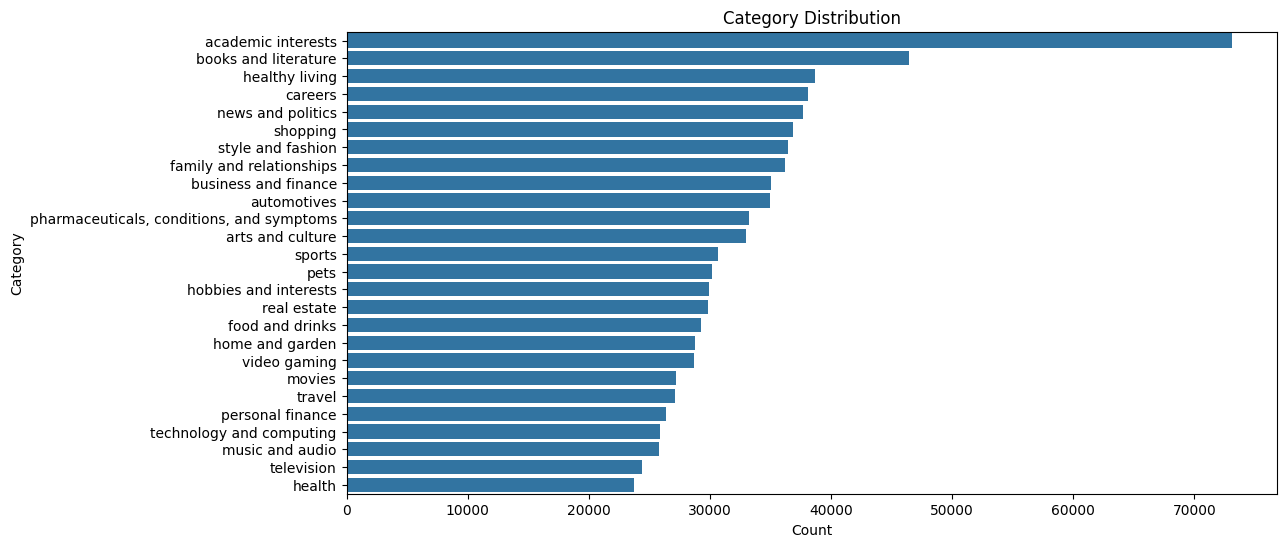

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['target'], order=df['target'].value_counts().index)
plt.title("Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

In [11]:
df.head()

,text,target,Word Count
0,"python courses python courses, python exercis...",academic interests,125
1,the learning point open digital education. a r...,academic interests,147
2,"equl offers enzyme assay kits, reagent mixtur...",academic interests,353
3,"tech news, latest technology, mobiles, laptops...",academic interests,143
4,the best it certification materials in usa | k...,academic interests,364


## Preprocessing: Clean and prepare the text

##### Check for missing values

In [ ]:
print("\nChecking for Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)

##### Handle missing values if any

In [ ]:
if missing_values.any():
    print("\nHandling Missing Values...")
    df = df.dropna()  # Drop rows with missing values
    print("Missing values dropped.")
else:
    print("No missing values found.")

##### Text preprocessing function

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

##### Apply preprocessing to the text column

In [ ]:
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [ ]:
df[['text', 'cleaned_text']].head()

### Save the processed DataFrame to a new CSV file

In [18]:
folder_path = './global_models_and_dataset/'
os.makedirs(folder_path, exist_ok=True)
file_path = os.path.join(folder_path, 'processed_dataset.csv')
df.to_csv(filepath, index=False)

# Checking processed dataset

In [19]:
df1 = pd.read_csv('processed_dataset.csv')

In [22]:
len(df1)

867578

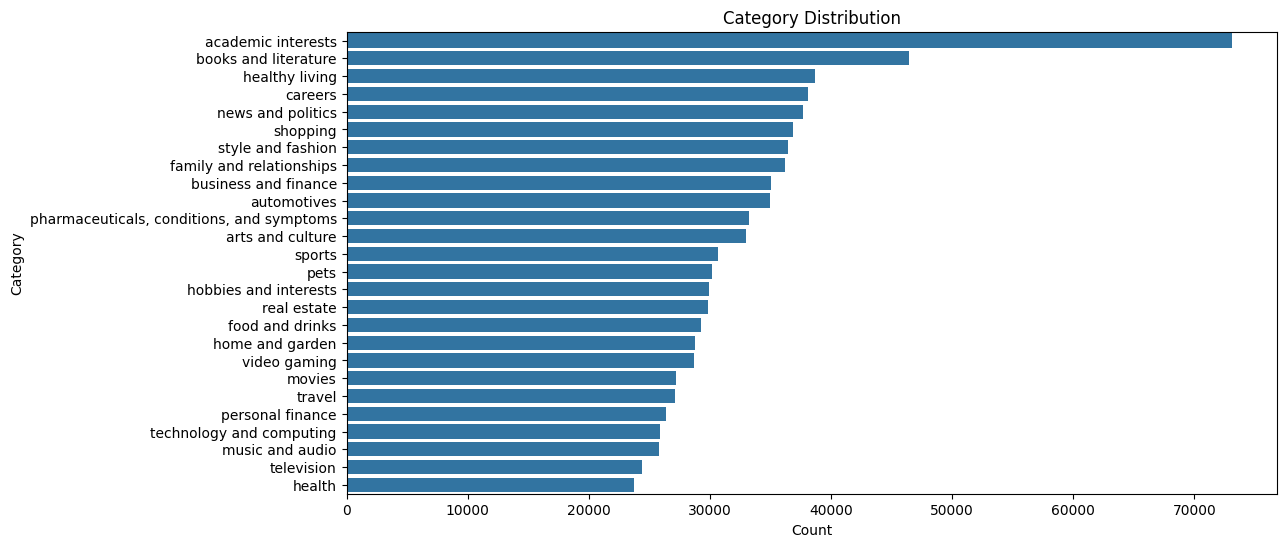

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['target'], order=df['target'].value_counts().index)
plt.title("Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()